Name - Tharundi P.D.
Index No - 190626H

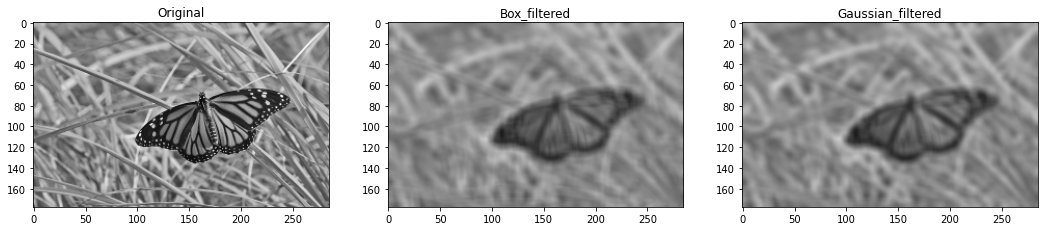

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

k = 9
sigma = 4
im = cv.imread(r'butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4)
box = 1./81*np.ones((9,9))
im_avg = cv.filter2D(im, -1, box)
im_gau = cv.GaussianBlur(im, (k,k), sigma)

fig, ax = plt.subplots(1,3,figsize=(18,6))
ax[0].imshow(im, cmap = 'gray', vmin = 0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(im_avg, cmap = 'gray', vmin = 0, vmax=255)
ax[1].set_title('Box_filtered')
ax[2].imshow(im_gau, cmap = 'gray', vmin = 0, vmax=255)
ax[2].set_title('Gaussian_filtered')
plt.show()

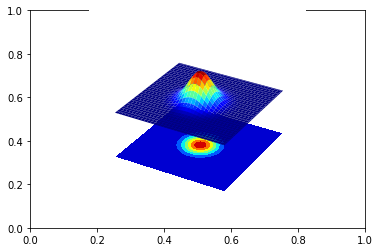

In [9]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig , ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')

step = 0.1
x = np.arange(-5,5+step,step)
y = np.arange(-5,5+step,step)
xx, yy = np.meshgrid(x,y)
sigma = 1
g = np.exp(-(xx**2 + yy**2)/(2*sigma**2))
surf = ax.plot_surface(xx, yy, g, cmap=cm.jet)
cset = ax.contourf(xx,yy,g,zdir='z',offset=np.min(g)-1.5,cmap=cm.jet)
ax.set_zlim(np.min(g)-2,np.max(g))
plt.axis('off')
plt.show()


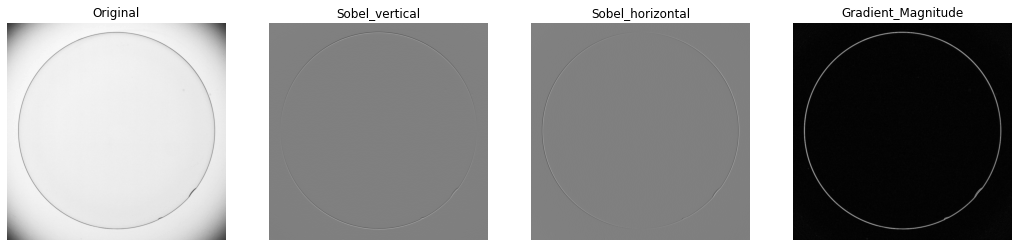

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

im_1 = cv.imread(r'contact_lens.tif', cv.IMREAD_GRAYSCALE).astype(np.float32)

sobel_v = np.array([[-1,-2,-1],[0,0,0],[1,2,1]], dtype = np.float32)
im_2 = cv.filter2D(im_1,-1,sobel_v)

sobel_h = np.array([[-1,0,1],[-2,0,2],[-1,0,1]], dtype = np.float32)
im_3 = cv.filter2D(im_1,-1,sobel_h)

grad_mag = np.sqrt(im_2**2+im_3**2)

fig, ax = plt.subplots(1,4,figsize=(18,6))
ax[0].imshow(im_1, cmap = 'gray', vmin = 0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(im_2, cmap = 'gray', vmin = -1020, vmax=1020)
ax[1].set_title('Sobel_vertical')
ax[2].imshow(im_3, cmap = 'gray', vmin = -1020, vmax=1020)
ax[2].set_title('Sobel_horizontal')
ax[3].imshow(grad_mag, cmap = 'gray')
ax[3].set_title('Gradient_Magnitude')
for i in range(4):
    ax[i].axis('off')
plt.show()

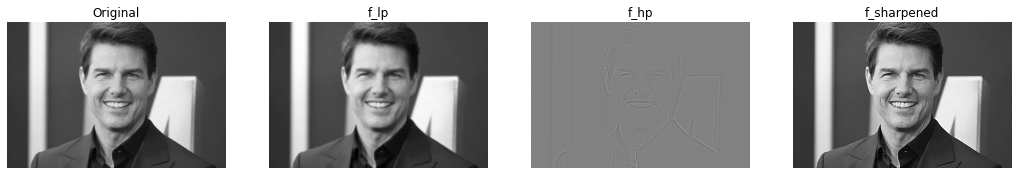

In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

f = cv.imread(r'tom.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)

sigma = 2
gaussian_1d = cv.getGaussianKernel(5, sigma)
f_lp = cv.sepFilter2D(f, -1, gaussian_1d, gaussian_1d)
f_hp = f - f_lp
f_sharpened = cv.addWeighted(f, 1.0, f_hp, 2.0, 0)

fig, ax = plt.subplots(1,4,figsize=(18,6))
ax[0].imshow(f, cmap = 'gray', vmin = 0, vmax=255)
ax[0].set_title('Original')
ax[1].imshow(f_lp, cmap = 'gray')
ax[1].set_title('f_lp')
ax[2].imshow(f_hp, cmap = 'gray')
ax[2].set_title('f_hp')
ax[3].imshow(f_sharpened, cmap = 'gray', vmin = 0, vmax=255)
ax[3].set_title('f_sharpened')
for i in range(4):
    ax[i].axis('off')
plt.show()